In [1]:
import pandas as pd

data = pd.read_csv("basura.csv")
data.head()

,mensaje,etiqueta
0,¡3 TEXTOS DEL TAROT GRATIS! ¡Descubre ahora tu...,basura
1,¡No 1 tono POLIFÓNICO 4 ur mob cada semana! Si...,basura
2,"Bienvenido a Select, un servicio O2 con benefi...",basura
3,Última oportunidad 2 reclame su valor de £ 150...,basura
4,Dorothy@kiefer.com (Bank of Granite emite Stro...,basura


In [2]:
data.etiqueta.value_counts(normalize=True)

basura      0.550069
legítimo    0.449931
Name: etiqueta, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)

print(f"Tenemos {data.shape[0]} datos en total.")
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")

Tenemos 729 datos en total.
El conjunto de datos de entrenamiento (train) tiene 583 datos.
El conjunto de datos de prueba (test) tiene 146 datos.


In [7]:
# import nltk
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [8]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')


def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [9]:
X_train = tfidf_vect.fit_transform(train.mensaje.values)
y_train = train.etiqueta.values

X_test = tfidf_vect.transform(test.mensaje.values)
y_test = test.etiqueta.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (583, 2422)
Tamaño de X_test (prueba): (146, 2422)
Tamaño de y_train 583 y tamaño de y_test 146


### Entrenar el modelo

In [10]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

# Inicializar los clasificadores
nb = MultinomialNB()
logreg = LogisticRegression(class_weight='balanced')
svm = LinearSVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')

In [11]:
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train);

In [12]:
# !pip install --upgrade scikit-learn
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")
print(f"Árbol de decisión: {accuracy_score(y_test, y_pred_dt):>9.2f}")

Naive Bayes:            0.91
Regresión Logística:    0.97
SVM:                    0.97
Árbol de decisión:      0.95


In [15]:
metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='basura'):.2f}")
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='basura'):.2f}")
    print(f"SVM: {metrica(y_test, y_pred_svm, pos_label='basura'):.2f}")
    print(f"Árbol de decisión: {metrica(y_test, y_pred_dt, pos_label='basura'):.2f} \n")

precision_score
Naive Bayes: 0.88
Regresión Logística: 0.98
SVM: 0.99
Árbol de decisión: 0.98 

recall_score
Naive Bayes: 0.99
Regresión Logística: 0.98
SVM: 0.97
Árbol de decisión: 0.94 

f1_score
Naive Bayes: 0.93
Regresión Logística: 0.98
SVM: 0.98
Árbol de decisión: 0.96 



In [16]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

      basura       0.99      0.97      0.98        86
    legítimo       0.95      0.98      0.97        60

    accuracy                           0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146



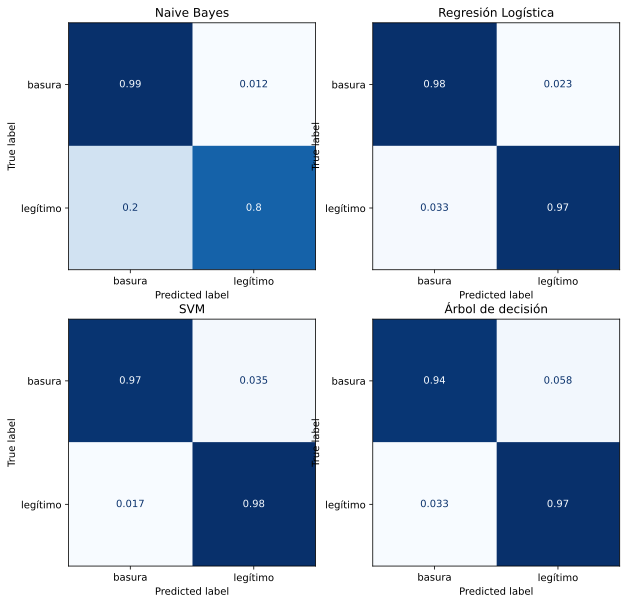

In [17]:
%config InlineBackend.figure_format = 'svg'

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
plot_confusion_matrix(nb, X_test, y_test, cmap="Blues", ax=ax1, normalize='true').im_.colorbar.remove()
plt.title("Naive Bayes")

ax2 = fig.add_subplot(2,2,2)
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues', ax=ax2, normalize='true').im_.colorbar.remove()
plt.title("Regresión Logística")

ax3 = fig.add_subplot(2,2,3)
plot_confusion_matrix(svm, X_test, y_test, cmap = 'Blues', ax=ax3, normalize='true').im_.colorbar.remove() 
plt.title("SVM");

ax4 = fig.add_subplot(2,2,4)
plot_confusion_matrix(dt, X_test, y_test, cmap = 'Blues', ax=ax4, normalize='true').im_.colorbar.remove() 
plt.title("Árbol de decisión");

In [18]:
# Test
nuevos = ['Hola tú, estás por ahí?', 'ENTRADAS GRATIS MARCANDO AL 5555']
nuevos_trans = tfidf_vect.transform(nuevos)
# dt.predict(nuevos_trans)
nb.predict_proba(nuevos_trans)

array([[0.30839935, 0.69160065],
       [0.68673671, 0.31326329]])

In [19]:
# Explicación 
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}
# Las palabras que contribuyen a la clase 0
[(vocab[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(), sorted(logreg.coef_[0]))][:10]

[('llame', -3.06),
 ('gratis', -1.74),
 ('envíe', -1.55),
 ('txt', -1.5),
 ('premio', -1.49),
 ('texto', -1.47),
 ('www', -1.45),
 ('envía', -1.3),
 ('mensaje', -1.24),
 ('móvil', -1.23)]

In [20]:
# Árbol de decisión (feature importances)
[(vocab[e[0]],round(e[1],2)) for e in zip(dt.feature_importances_.argsort(), sorted(dt.feature_importances_))][-10:]

[('video', 0.02),
 ('sms', 0.03),
 ('gratis', 0.03),
 ('com', 0.03),
 ('llama', 0.06),
 ('txt', 0.08),
 ('envía', 0.08),
 ('www', 0.08),
 ('envíe', 0.11),
 ('llame', 0.2)]

In [25]:
# https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft
# https://graphviz.org/download/
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

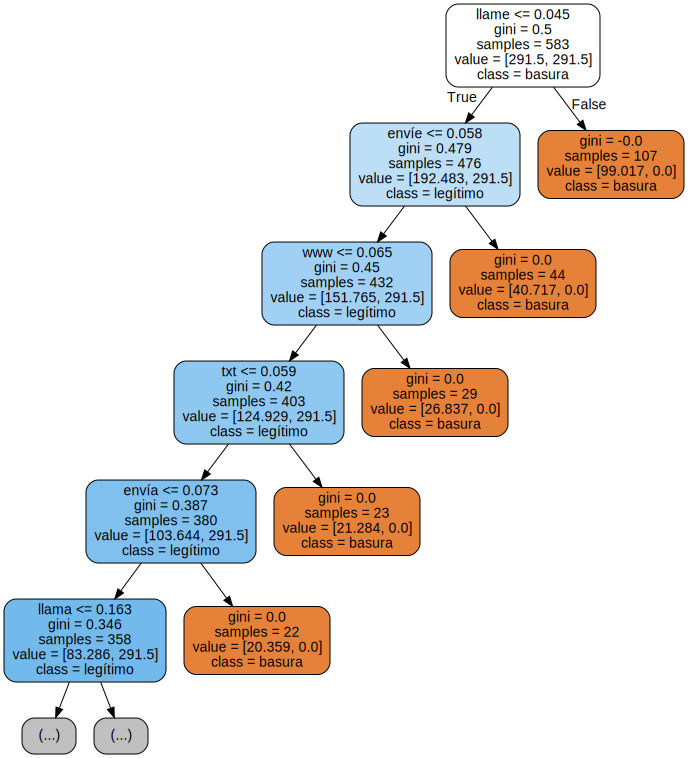

In [26]:
# !pip install graphviz
import graphviz 
from sklearn.tree import export_graphviz

viz = export_graphviz(dt, 
                      out_file=None, # ¿Salvar en el computador?
                      max_depth=5, # Máxima profundidad
                      feature_names=list(dict(sorted(tfidf_vect.vocabulary_.items())).keys()), # Palabras
                      class_names = ['basura', 'legítimo'],
                      rounded=True, filled=True
                     )

graph = graphviz.Source(viz)
graph
